<H1 style = "color : blue"> Uber Supply-Demand Gap </H1>

<H3 style = "color : brown"><b>Introduction:</b><br></H3>
This data set is a masked data set which is similar to what data analysts at Uber handle. Solving this assignment will give you an idea about how problems are systematically solved using EDA and data visualization. 
<br>

<H3 style = "color : brown"><b>Business Understanding: </b><br></H3>
You may have some experience of traveling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?<br>
Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue.

<H3 style = "color : brown"><b>Problem Statement:</b><br></H3>
As an analyst, you decide to address the problem Uber is facing - driver cancellation and non-availability of cars leading to loss of potential revenue. <br>
The aim of the analysis is to identify <b>the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation</b>. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them.  


In [196]:
# load a library we will use in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [198]:
# Loading a data
df = pd.read_csv("Uber Request Data.csv")
df.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


<H3 style = "color : brown"><b>Data Attributes</b><br></H3>

There are six attributes associated with each request made by a customer:
1. <b>Request id</b>: A unique identifier of the request
2. <b>Pick-up point</b>: The point from which the request was made
3. <b>Driver id</b>: The unique identification number of the driver
4. <b>Status of the request</b>: The final status of the trip, can be either completed, canceled by the driver or no cars are available
5. <b>Time of request</b>: The date and time at which the customer made the trip request
6. <b>Drop-off time</b>: The drop-off date and time, in case the trip was completed 

Note: For this assignment, only the trips to and from the airport are being considered.


In [3]:
# total Records of Dataset
df.shape

(6745, 6)

In [4]:
# find detail about all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


> <b>Initial Observations:
1. Driver id and Drop Timestamp have lot of nulls
2. Driver id does it need to be float (need to check)
3. from DF.head(), we saw Request timestamp and Drop Timestamp have value in different format.


In [5]:
#to see all Null Values in dataset
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [195]:
# Correcting Datetime format for both the column
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"])
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"])

df.head(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request Day,Request DOW,Drop hour,Drop Day,Drop DOW,TimeSlot,Demand,Supply,Gap,City_Driver,Airport_Driver
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Monday,13.0,7.0,Monday,Day Time,1,1,0,0,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Monday,18.0,7.0,Monday,Evening,1,1,0,0,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Wednesday,9.0,7.0,Wednesday,Day Time,1,1,0,1,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Wednesday,22.0,7.0,Wednesday,Evening,1,1,0,0,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Wednesday,9.0,13.0,Wednesday,Morning,1,1,0,1,0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Wednesday,22.0,13.0,Wednesday,Evening,1,1,0,0,1
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Thursday,7.0,14.0,Thursday,Morning,1,1,0,0,1
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Friday,6.0,15.0,Friday,Morning,1,1,0,0,1
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Friday,18.0,15.0,Friday,Evening,1,1,0,1,0
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,Monday,7.0,7.0,Monday,Morning,1,1,0,1,0


> <b>DateTime format for Request Timestamp and Drop TimeStamp is corrected

In [7]:
#Check if there are Duplicate value
len(df[df.duplicated()].index)

0

<H1 Style = "color : blue">Exploratory Data Analysis</H1><br>
<H2 style = "color : brown">1. Request ID is unique?</H2>

In [8]:
# check whether Request ID is unique in a table

print("Unique Request ID : ",df["Request id"].nunique(),"\n","Total Column in Data Set : ",df.shape)
df.shape

Unique Request ID :  6745 
 Total Column in Data Set :  (6745, 6)


(6745, 6)

> <b> Request ID is Primary Key

<H2 style = "color : brown">2. Unique Pickup Point in Uber Dataset?</H2>

In [9]:
# Check how many unique pickup point available in Dataset

df["Pickup point"].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [11]:
df["Pickup point"].value_counts(normalize = True)


City       0.519941
Airport    0.480059
Name: Pickup point, dtype: float64

> <b> Pickup pount is either City or Airport only with Request distribution of from City(51%) vs from Airport(49%)
    

<H2 style = "color : brown">3. Driver ID is NULL?</H2>


In [12]:
#Check why Driver ID is NULL
df.groupby("Status")["Request id","Driver id"].count()

,Request id,Driver id
Status,,
Cancelled,1264,1264
No Cars Available,2650,0
Trip Completed,2831,2831


> <b> Driver ID is only Null where Status is "No Car Available" which completely make sense so no need to handle this nulls

<H2 style = "color : brown">4. Unique Value of Status</H2>


In [14]:
df["Status"].value_counts()


Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [15]:
df["Status"].value_counts(normalize = True)


Trip Completed       0.419718
No Cars Available    0.392884
Cancelled            0.187398
Name: Status, dtype: float64

> <b> only 41% of total Requested trip is completed, where as No Car available is 39% and Cancelled is 18% which is sheer loss of business
    

<H2 style = "color : brown">5. Why Drop Timestamp field is NULL?</H2>

In [16]:
#Check why Driver ID is NULL
df.groupby("Status")["Request id","Drop timestamp"].count()

,Request id,Drop timestamp
Status,,
Cancelled,1264,0
No Cars Available,2650,0
Trip Completed,2831,2831


> <b>only Completed Trip have got Drop Time stamp which make sense

<H1 Style = "color : blue">Univariate Analysis</H1><br>

In [17]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


<H2 style = "color : brown">1. Status Analysis</H2>

In [18]:
df.groupby("Status")["Request id"].count().reset_index()


,Status,Request id
0,Cancelled,1264
1,No Cars Available,2650
2,Trip Completed,2831


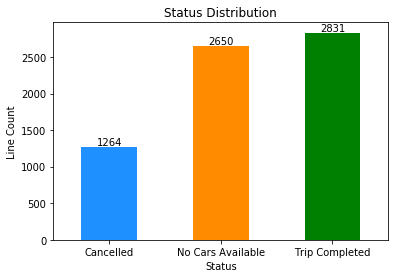

In [70]:
status = df.groupby("Status")["Request id"].count()


ax = status.plot.bar("Status","Request id",color = {"darkorange","dodgerblue","Green"})
plt.xlabel("Status")
plt.ylabel("Line Count")

for p in ax.patches:
    ax.text(p.get_x()+0.25, p.get_height()+25, p.get_height(),
            #'{:} %'.format(round(p.get_height()/len(df) * 100,2)), 
            ha="center")

plt.title("Status Distribution")
plt.xticks(rotation=360)
plt.show()


Text(0.5, 1.0, 'Status Distributon')

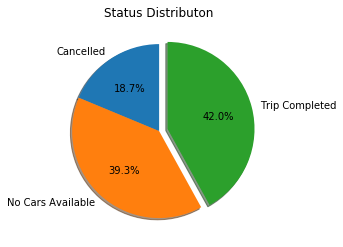

In [71]:
#status.index.values
#status.values
fig1, ax1 = plt.subplots()
explode = (0, 0, 0.1)

ax1.pie(status.values, explode=explode, labels=status.index.values, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title("Status Distributon")

#ax.pie(status.values, labels = status.index.values)

<H2 style = "color : brown">2. Pickup Point Analysis</H2>

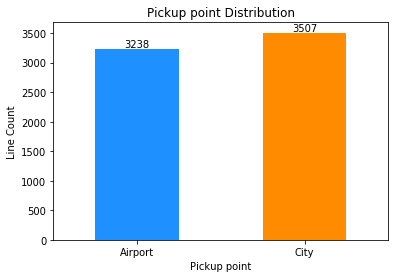

In [73]:
pickup = df.groupby("Pickup point")["Request id"].count()


ax = pickup.plot.bar("Pickup point","Request id",color = {"darkorange","dodgerblue"})
plt.xlabel("Pickup point")
plt.ylabel("Line Count")

for p in ax.patches:
    ax.text(p.get_x()+0.25, p.get_height()+25, p.get_height(), ha="center")

plt.title("Pickup point Distribution")
plt.xticks(rotation=360)
plt.show()


Text(0.5, 1.0, 'Pickup Point Distributon')

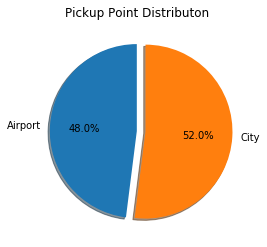

In [75]:
#status.index.values
#status.values
fig1, ax1 = plt.subplots()
explode = (0, 0.1)

ax1.pie(pickup.values, explode=explode, labels=pickup.index.values, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title("Pickup Point Distributon")

#ax.pie(status.values, labels = status.index.values)

<H2 style = "color : brown">2. Driver Analysis</H2>

In [81]:
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request Day,Request DOW,Drop hour,Drop Day,Drop DOW,TimeSlot,Demand,Supply,Gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Monday,13.0,7.0,Monday,Day Time,1,1,Trip Completed
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Monday,18.0,7.0,Monday,Evening,1,1,Trip Completed


In [100]:
df["City_Driver"] =np.where (((df["Pickup point"] == "City") & (df["Status"] == "Trip Completed")),1,0)
df["Airport_Driver"] =np.where (((df["Pickup point"] == "Airport") & (df["Status"] == "Trip Completed")),1,0)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request Day,Request DOW,Drop hour,Drop Day,Drop DOW,TimeSlot,Demand,Supply,Gap,City_Driver,Airport_Driver
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Monday,13.0,7.0,Monday,Day Time,1,1,Trip Completed,0,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Monday,18.0,7.0,Monday,Evening,1,1,Trip Completed,0,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Wednesday,9.0,7.0,Wednesday,Day Time,1,1,Trip Completed,1,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Wednesday,22.0,7.0,Wednesday,Evening,1,1,Trip Completed,0,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Wednesday,9.0,13.0,Wednesday,Morning,1,1,Trip Completed,1,0


In [105]:
driver = df.groupby(["Driver id"],as_index=True)["City_Driver","Airport_Driver"].sum()
driver.head()


,City_Driver,Airport_Driver
Driver id,,
1.0,3,6
2.0,5,4
3.0,3,7
4.0,5,5
5.0,7,4


In [110]:
driver["Category"] = np.where(((driver.City_Driver > 0) & (driver.Airport_Driver > 0)),"Airport & City Driver",
                             np.where((driver.City_Driver > 0),"City Driver",
                                     np.where((driver.Airport_Driver > 0),"Airport Driver","NA")))

In [112]:
driver.Category.value_counts()

Airport & City Driver    296
City Driver                3
Airport Driver             1
Name: Category, dtype: int64

In [117]:
driver.head()

,City_Driver,Airport_Driver,Category
Driver id,,,
1.0,3,6,Airport & City Driver
2.0,5,4,Airport & City Driver
3.0,3,7,Airport & City Driver
4.0,5,5,Airport & City Driver
5.0,7,4,Airport & City Driver


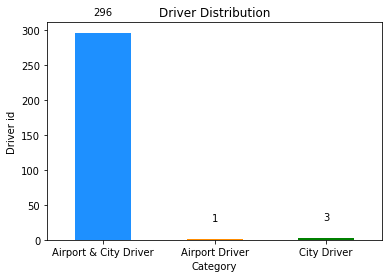

In [122]:
driver_cat = driver.groupby("Category")["City_Driver"].count()


ax = driver_cat.plot.bar("Category","City_Driver",color = {"Green","darkorange","dodgerblue"})
plt.xlabel("Category")
plt.ylabel("Driver id")

for p in ax.patches:
    ax.text(p.get_x()+0.25, p.get_height()+25, p.get_height(), ha="center")

plt.title("Driver Distribution")
plt.xticks(rotation=360)
plt.show()


<H1 Style = "color : blue">Bivariate Analysis</H1><br>

In [21]:
df.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

In [22]:
df.groupby(['Status','Pickup point']).count()

Request id  Driver id  Request timestamp  \
Status            Pickup point                                             
Cancelled         Airport              198        198                198   
                  City                1066       1066               1066   
No Cars Available Airport             1713          0               1713   
                  City                 937          0                937   
Trip Completed    Airport             1327       1327               1327   
                  City                1504       1504               1504   

                                Drop timestamp  
Status            Pickup point                  
Cancelled         Airport                    0  
                  City                       0  
No Cars Available Airport                    0  
                  City                       0  
Trip Completed    Airport                 1327  
                  City                    1504

In [23]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


<Figure size 864x576 with 0 Axes>

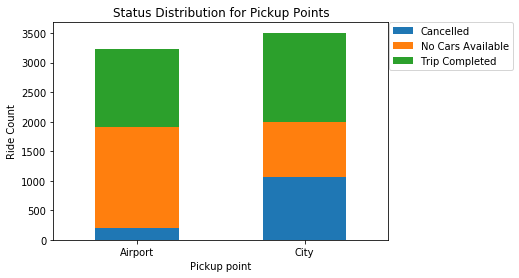

In [143]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
df.groupby(['Pickup point','Status'])["Request id"].count().unstack().plot(kind= "bar", stacked=True)
plt.legend(bbox_to_anchor=(1.001, 1), loc=2, borderaxespad=0.)
plt.title("Status Distribution for Pickup Points")
plt.ylabel("Ride Count")
plt.xticks(rotation=360)
plt.show()

<Figure size 864x576 with 0 Axes>

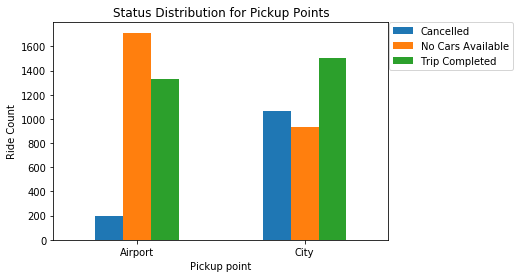

In [144]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
df.groupby(['Pickup point','Status'])["Request id"].count().unstack().plot(kind= "bar")
plt.legend(bbox_to_anchor=(1.001, 1), loc=2, borderaxespad=0.)
plt.title("Status Distribution for Pickup Points")
plt.ylabel("Ride Count")
plt.xticks(rotation=360)
plt.show()

<H3 Style = "color : brown">create date and hour field from Request Time Stamp</H1><br>

In [24]:
#Add hour, Day and weekday Name for Request and Drop Timestamp

df["Request hour"] =df["Request timestamp"].dt.hour
df["Request Day"] = df["Request timestamp"].dt.day
df["Request DOW"] = df["Request timestamp"].dt.day_name()

df["Drop hour"] =df["Drop timestamp"].dt.hour
df["Drop Day"] = df["Drop timestamp"].dt.day
df["Drop DOW"] = df["Drop timestamp"].dt.day_name()

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request Day,Request DOW,Drop hour,Drop Day,Drop DOW
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Monday,13.0,7.0,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Monday,18.0,7.0,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Wednesday,9.0,7.0,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Wednesday,22.0,7.0,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Wednesday,9.0,13.0,Wednesday


<Figure size 864x576 with 0 Axes>

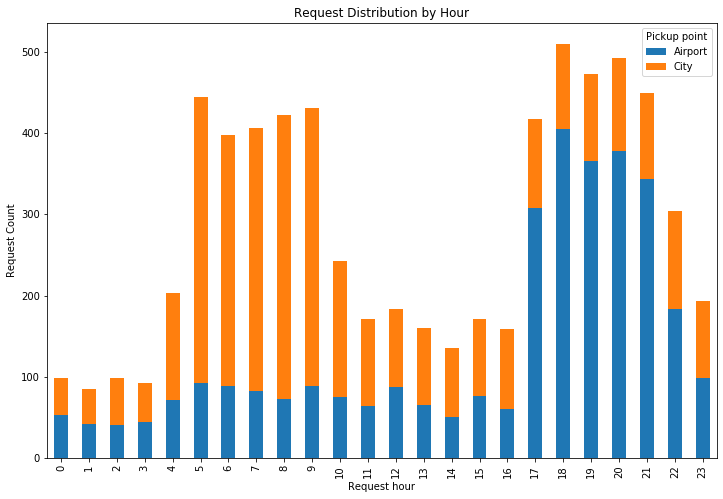

In [154]:
# See Request by on Hourly basis

plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')

ax = df.groupby(["Request hour","Pickup point"])["Request id"].count().unstack().plot(kind= "bar", stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title("Request Distribution by Hour")
plt.ylabel("Request Count")
plt.show()

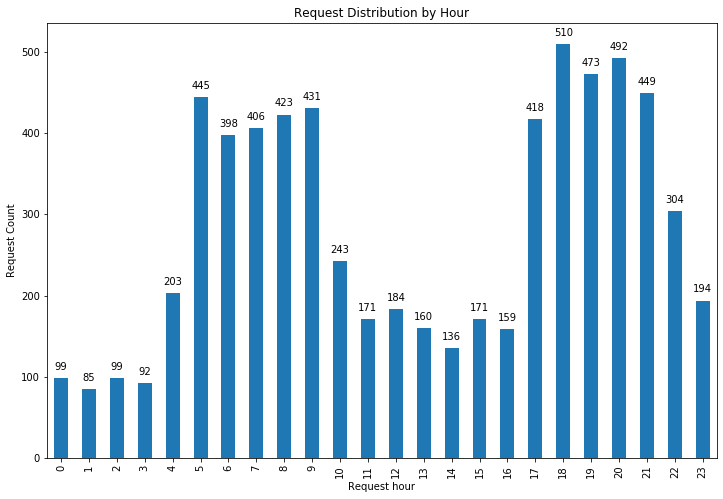

In [25]:
# See Request by on Hourly basis

plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')

ReqHour = df.groupby("Request hour")["Request id"].count()

ax = ReqHour.plot.bar("Request hour","Request id")

for p in ax.patches:
    ax.text(p.get_x()+0.25, p.get_height()+10, p.get_height(), ha="center")

plt.title("Request Distribution by Hour")
plt.ylabel("Request Count")
plt.show()

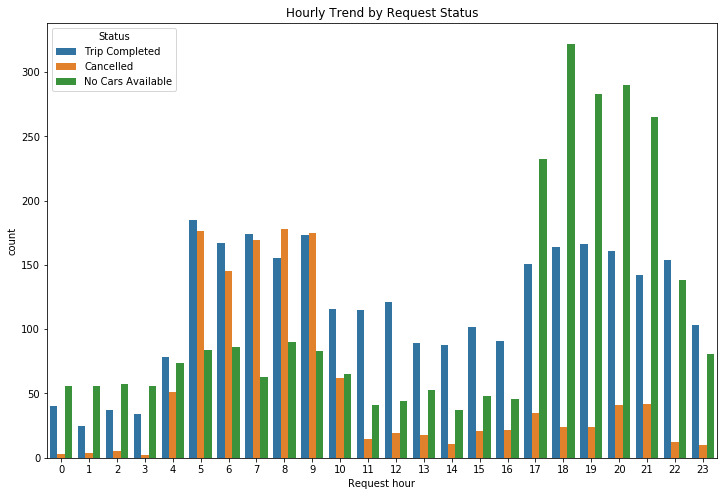

In [156]:
# Show Status by hour
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')

sns.countplot(x="Request hour",hue = "Status",data = df)
plt.title("Hourly Trend by Request Status")

plt.show()

> <b> Observations:
- from 5 to 9 AM  Trip Cancelled and Completed are almost same.
- after 17 PM for most of request Car are not available    

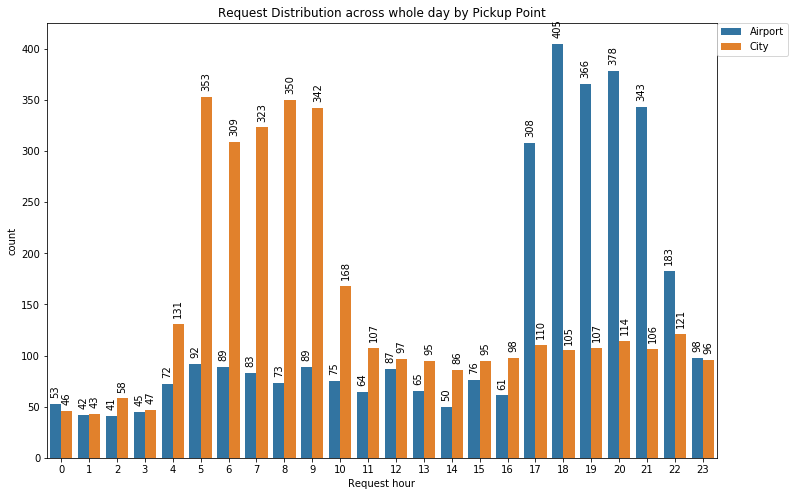

In [27]:
# Show Pickup Point by hour
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax = sns.countplot(x="Request hour",hue = "Pickup point",data = df)
plt.legend(bbox_to_anchor=(1.001, 1), loc=2, borderaxespad=0.)
plt.title("Request Distribution across whole day by Pickup Point")

for p in ax.patches:
    ax.text(p.get_x()+0.20, p.get_height()+8, p.get_height(), ha="center",rotation = 'vertical')
    
plt.show()

> <b> Observations:
- till 16:00 Ride Request comming from City is more than Airport

<Figure size 864x576 with 0 Axes>

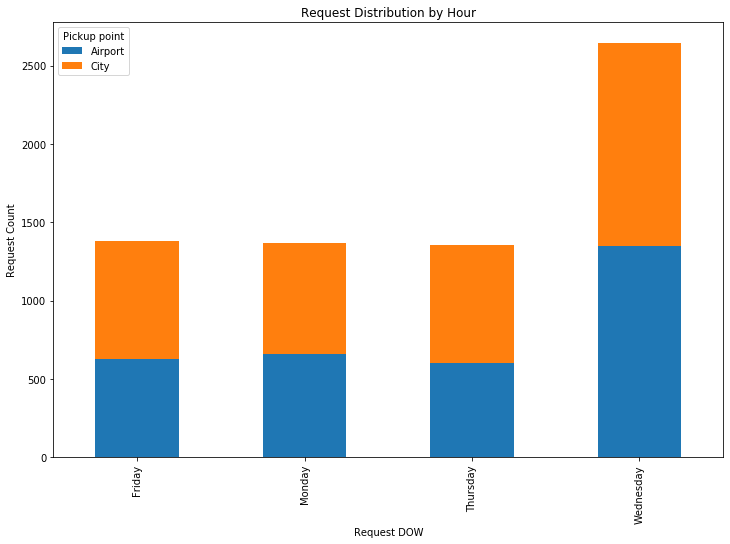

In [155]:
# See Request by on Hourly basis

plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')

ax = df.groupby(["Request DOW","Pickup point"])["Request id"].count().unstack().plot(kind= "bar", stacked=True)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title("Request Distribution by Hour")
plt.ylabel("Request Count")
plt.xlabel("Request Weekday")

plt.show()

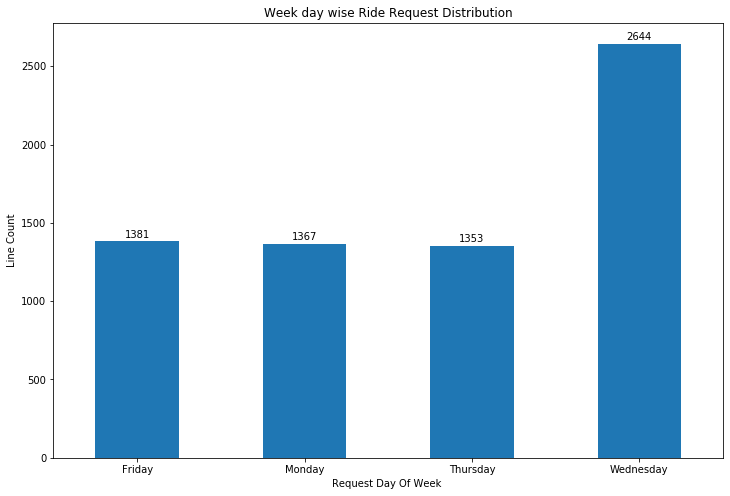

In [145]:
#Week day wise Ride Request Distribution

plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')

ReqDay = df.groupby("Request DOW")["Request id"].count()
ax = ReqDay.plot.bar("Request DOW","Request id")
plt.xlabel("Request Day Of Week ")
plt.ylabel("Line Count")

for p in ax.patches:
    ax.text(p.get_x()+0.25, p.get_height()+25, p.get_height(), ha="center")

plt.title("Week day wise Ride Request Distribution")
plt.xticks(rotation=360)
plt.show()


<H3 Style = "color : brown">add Time Slot field on Request Time Stamp</H1><br>

In [29]:
def TimeSlot(x):
    if x < 5:
        return "Pre Morning"
    elif x < 9:
        return "Morning"
    elif x < 17:
        return "Day Time"
    elif x < 22:
        return "Evening"
    else :
        return "Night"
    

df["TimeSlot"] = df["Request hour"].apply(lambda x : TimeSlot(x))

In [30]:
df[["Request hour","TimeSlot"] ]

,Request hour,TimeSlot
0,11,Day Time
1,17,Evening
2,9,Day Time
3,21,Evening
4,8,Morning
...,...,...
6740,23,Night
6741,23,Night
6742,23,Night
6743,23,Night


In [31]:
df["TimeSlot"].value_counts()

Evening        2342
Morning        1672
Day Time       1655
Pre Morning     578
Night           498
Name: TimeSlot, dtype: int64

In [32]:
df["TimeSlot"].value_counts(normalize = True) * 100

Evening        34.722016
Morning        24.788732
Day Time       24.536694
Pre Morning     8.569311
Night           7.383247
Name: TimeSlot, dtype: float64

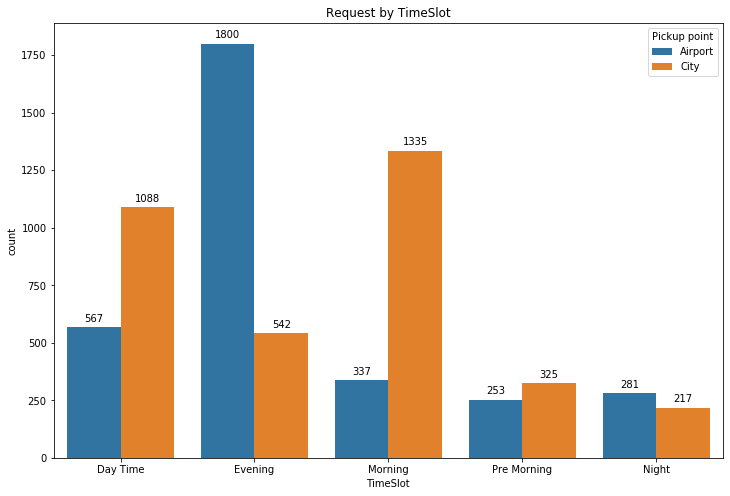

In [33]:
# Request by TimeSlot

plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')


ax = sns.countplot(x="TimeSlot",hue = "Pickup point",data = df)

for p in ax.patches:
    ax.text(p.get_x()+0.20, p.get_height()+25, p.get_height(), ha="center")


plt.title("Request by TimeSlot")

plt.show()

> <b>Observations:
    - only Evening have considerable more than 150% of Ride from Airport rest all time City peeks over Airport.

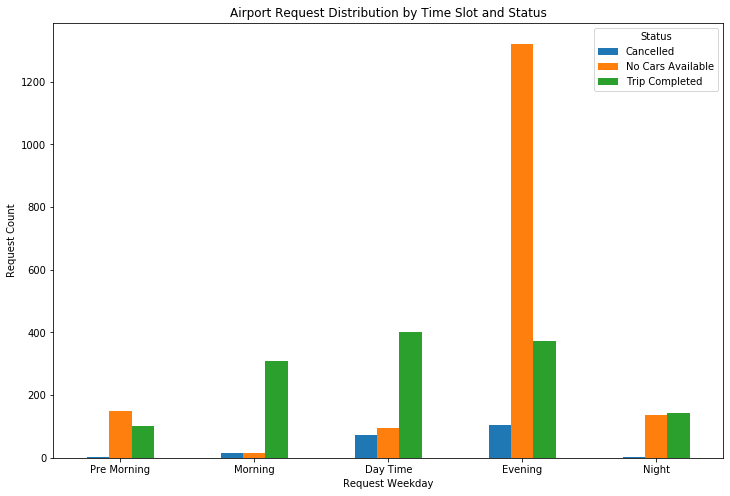

In [171]:
# Airport Trend by TimeSlot and Status
df_airport = df[df["Pickup point"] == "Airport"]
ax = df_airport.groupby(["TimeSlot","Status"])["Request id"].count().unstack().reindex(['Pre Morning','Morning','Day Time','Evening','Night']).plot(kind= "bar")
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title("Airport Request Distribution by Time Slot and Status")
plt.ylabel("Request Count")
plt.xlabel("Request Weekday")
plt.xticks(rotation=360)
plt.show()



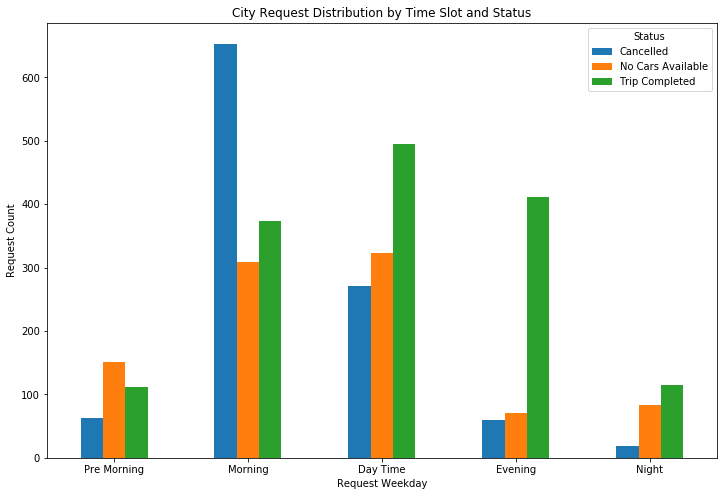

In [172]:
# City Trend by TimeSlot and Status
df_airport = df[df["Pickup point"] == "City"]
ax = df_airport.groupby(["TimeSlot","Status"])["Request id"].count().unstack().reindex(['Pre Morning','Morning','Day Time','Evening','Night']).plot(kind= "bar")
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title("City Request Distribution by Time Slot and Status")
plt.ylabel("Request Count")
plt.xlabel("Request Weekday")
plt.xticks(rotation=360)
plt.show()



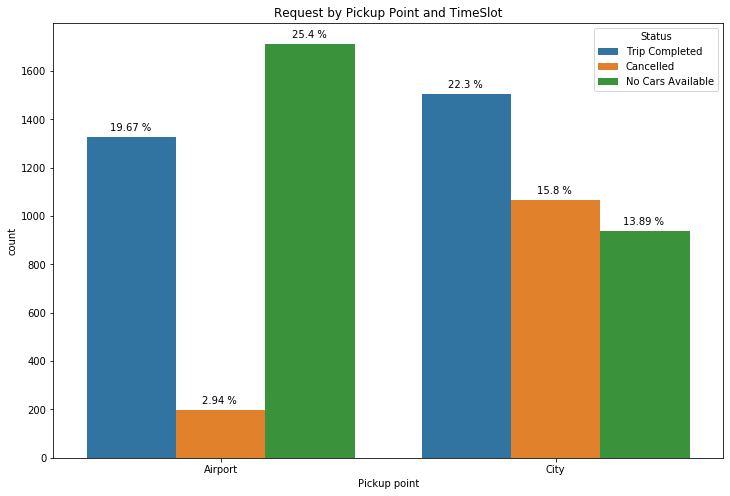

In [34]:
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')

ax = sns.countplot(x="Pickup point",hue = "Status",data = df)

for p in ax.patches:
    ax.text(p.get_x()+0.13, p.get_height()+25, '{:} %'.format(round(p.get_height()/len(df) * 100,2)), ha="center")


plt.title("Request by Pickup Point and TimeSlot")
plt.show()

> <b>Observations:
    - Evening we see lot of Cars Not available.
    - we can relate this with previous bar and come to a conclusion that Evening have more rides from Airport, where Cars are not Available ending up loosing business
    - in Morning we see almost equall number of Cancellation 

<H2 style = "color : Blue">Lets Analyse Morning Time Slot Data</H2>

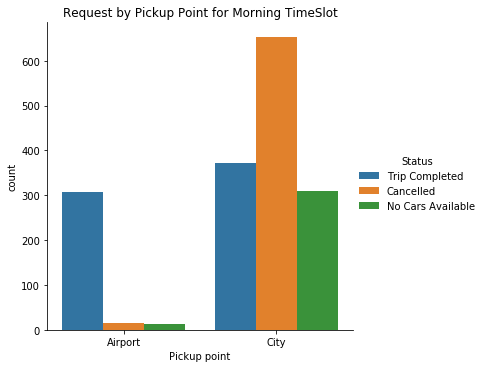

In [177]:
sns.factorplot(x="Pickup point",hue = "Status",data = df[df.TimeSlot == 'Morning'], kind = "count",order = ["Airport","City"])
plt.title("Request by Pickup Point for Morning TimeSlot")

plt.show()

> <b>Observation:
    - Clearly shows that more cancellation happened in City and same resulted in leading to No Car Available

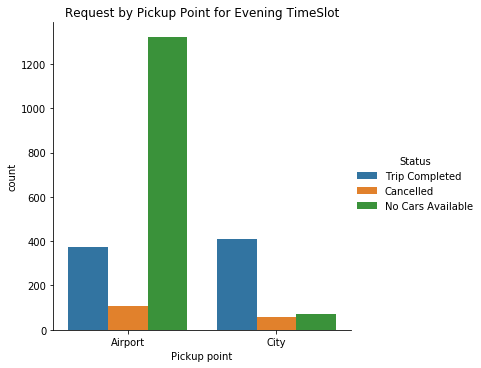

In [176]:
sns.factorplot(x="Pickup point",hue = "Status",data = df[df.TimeSlot == 'Evening'], kind = "count")
plt.title("Request by Pickup Point for Evening TimeSlot")

plt.show()

In [175]:
df_Morning = df[df.TimeSlot == 'Morning']

df_Morning.groupby(["Status","Pickup point"])["Request id"].count().unstack()

Pickup point,Airport,City
Status,,
Cancelled,15,653
No Cars Available,14,309
Trip Completed,308,373


<H3 Style = "color : brown">Demand and Supply Flag</H1><br>

In [178]:
df["Demand"] = 1
df["Supply"] = np.where(df["Status"] == "Trip Completed",1,0)
df["Gap"] = np.where(df["Status"] == "Trip Completed",0,1)

df.tail(4)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request Day,Request DOW,Drop hour,Drop Day,Drop DOW,TimeSlot,Demand,Supply,Gap,City_Driver,Airport_Driver
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Friday,NaN,NaN,NaN,Night,1,0,1,0,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Friday,NaN,NaN,NaN,Night,1,0,1,0,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Friday,NaN,NaN,NaN,Night,1,0,1,0,0
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT,23,15,Friday,NaN,NaN,NaN,Night,1,0,1,0,0


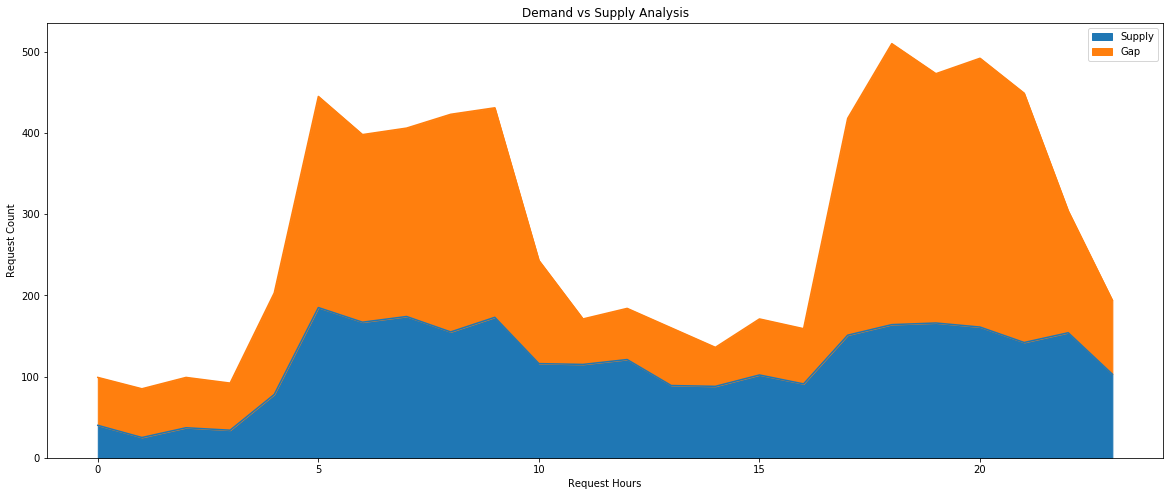

In [193]:
Gap = df.groupby(["Request hour"])["Supply","Gap"].sum()

Gap.plot(kind= "area", stacked=True)
fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.title("Demand vs Supply Analysis")
plt.ylabel("Request Count")
plt.xlabel("Request Hours")
#plt.grid()
plt.show()


1. <B>Higher Number of Cancellation from City in Morning</B>
    - Potential Reason : Demand is high from City to Airport but vice-versa is not true, hence driver tends to cancel the request as getting a return trip to city will be difficult.
    
    
   
   
2. <B>Car Unavailability from Airport in Evening</B>
    - Potential Reason : Demand is High from Airport but vice versa is not true.


<H1 Style = "color : Blue">Recommendation : </H1>

1. <b>Offer incentives</b> to all city trip pick-up points during morning peak hours and evening peak hours for all airport trip pick-up points.<br>
2. To fulfill the airport's high demand, <b>additional cab</b> must be introduced.
3. <b>Penalizing a driver</b>, a fee for canceling a request or restricting a driver's daily cancellations
4. <b>Ride-sharing (carpooling) services</b> can be quite useful in dealing with the problem of car shortages.
5. <b>Advance booking</b> is another helpful technique for drivers who want to plan their journey ahead of time, resulting in fewer cancellations.
